In [1]:
%pip install langchain_openai langgraph typing datetime langchain_core google.genai pandas matplotlib yfinance

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 61 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 5.1 MB/s eta 0:00:01
  Using cached typing-3.7.4.3-py3-none-any.whl
     |████████████████████████████████| 52 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 433 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 646 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 208 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 358 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 5.9 MB/s eta 0:00:01
  Using cached peewee-3.17.9-cp39-cp39-macosx_10_9_universal2.w

In [3]:
%pip install langchain_community

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.5 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.4 MB/s eta 0:00:01
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 5.0.1
    Uninstalling async-timeout-5.0.1:
      Successfully uninstalled async-timeout-5.0.1
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import intent
import visualisation

# Evaluating Intent Agent

In [7]:
from intent import IntentAgent, IntentAgentState
from datetime import datetime
import json

# Instantiate the IntentAgent.
intent_agent = IntentAgent()

# Define a session ID and test query.
session_id = "test_session_classification"

In [8]:
q1 = "Summarise the stock's earning calls for 2024."

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q1,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "document_analysis",
  "confidence": 0.95,
  "agents_needed": [
    "document"
  ],
  "explanation": "The query specifically asks for a summary of Apple's earnings calls for 2024, which falls under the analysis of documents like earnings transcripts. This is best handled by the document agent."
}

Agents Needed from Classification:
['document']


In [9]:
q2= "Summarise Apple Inc. call earnings and tell me its current stock sentiments?"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q2,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "document_analysis",
  "confidence": 0.9,
  "agents_needed": [
    "document",
    "sentiment"
  ],
  "explanation": "The query asks for a summary of Apple Inc.'s earnings call, which falls under document analysis, and also inquires about the current stock sentiment, which requires sentiment analysis. Therefore, both the document and sentiment agents are needed."
}

Agents Needed from Classification:
['document', 'sentiment']


In [10]:
q3 = "Give me a visualisation of Apple's stock in Q4 2024, and summarise its stock sentiments and 10K report"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q3,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "visualisation",
  "confidence": 0.9,
  "agents_needed": [
    "visualisation",
    "sentiment",
    "document"
  ],
  "explanation": "The user query requests a visualisation of Apple's stock in Q4 2024, which falls under the visualisation intent. Additionally, the query asks for a summary of stock sentiments and the 10K report, which requires the sentiment and document agents. All requested information is within the year 2024, making it in scope."
}

Agents Needed from Classification:
['visualisation', 'sentiment', 'document']


In [11]:
q4 = "What happened to the US tariffs in April 2025?"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q4,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "out_of_scope",
  "confidence": 0.95,
  "agents_needed": [],
  "explanation": "The query is about US tariffs in April 2025, which falls outside the data range of 2024. Additionally, it does not directly relate to Apple stock analysis within the available categories."
}

Agents Needed from Classification:
[]


In [12]:
q5 = "How are Apple's stocks in 2025?"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q5,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "out_of_scope",
  "confidence": 0.95,
  "agents_needed": [],
  "explanation": "The query asks about Apple's stock performance in 2025, which falls outside the available data range of 2024. Therefore, it is classified as out_of_scope."
}

Agents Needed from Classification:
[]


In [14]:
q6 = "How are Apple's earning calls in 2023 and 2024?"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q6,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "out_of_scope",
  "confidence": 0.9,
  "agents_needed": [],
  "explanation": "The query asks about Apple's earnings calls in 2023 and 2024. Since the system only has data for the year 2024, the part of the query concerning 2023 falls outside the available data range, making it out_of_scope."
}

Agents Needed from Classification:
[]


In [15]:
q7 = "How are Apple stock prices in 2024?"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q7,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "visualisation",
  "confidence": 0.9,
  "agents_needed": [
    "visualisation"
  ],
  "explanation": "The user is asking about Apple stock prices specifically in the year 2024, which suggests a need for a visual representation of stock price trends during that period. This falls under the visualisation intent as it involves creating a visualisation of stock prices for a specified time frame."
}

Agents Needed from Classification:
['visualisation']


In [16]:
q8 = "Apple stock sentiment in Q1 2024"

# Construct an initial state that matches your IntentAgentState.
initial_state: IntentAgentState = {
    "query": q8,
    "session_id": session_id,
    "chat_history": [],      # Assuming no previous conversation.
    "intent": None,
    "agent_responses": {},
    "final_response": None,
    "error": None,
    "debug_info": {
        "timestamp": datetime.now().isoformat(),
        "session_id": session_id
    }
}

# Run only the classification part of your pipeline.
state_after_classification = intent_agent._classify_intent(initial_state)

# Print debug information (raw classification output as returned by your LLM).
print("Debug Info - Raw Intent Classification Result:")
print(json.dumps(state_after_classification["debug_info"].get("intent_classification", {}), indent=2))

# Print out the list of agents needed from the parsed classification.
print("\nAgents Needed from Classification:")
print(state_after_classification["intent"].agents_needed)

Debug Info - Raw Intent Classification Result:
{
  "intent": "stock_sentiment",
  "confidence": 0.9,
  "agents_needed": [
    "sentiment"
  ],
  "explanation": "The user query specifically asks for the sentiment of Apple stock in Q1 2024, which falls under the category of analyzing current market sentiment. The sentiment agent is needed to handle this request."
}

Agents Needed from Classification:
['sentiment']


In [17]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

In [18]:
# Cell 2: Define 20 test queries & expected agents_needed
TEST_QUERIES = [
    {"query": "What's the sentiment on Apple in Q1 2024?", 
     "expected_agents": ["sentiment"]},
    {"query": "Show me a chart of Apple stock from 2024-01-01 to 2024-03-31", 
     "expected_agents": ["visualisation"]},
    {"query": "Summarize the 2024 AAPL earnings call transcript", 
     "expected_agents": ["document"]},
    {"query": "Who is Tim Cook married to?", 
     "expected_agents": []},
    {"query": "Tell me about Google's stock performance in 2024", 
     "expected_agents": []},
    {"query": "Plot AAPL closing price over the last six months of 2025", 
     "expected_agents": []},
    {"query": "Is the sentiment on AAPL bullish or bearish today?", 
     "expected_agents": []},
    {"query": "What do analysts say in the Q2 2024 call?", 
     "expected_agents": ["document"]},
    {"query": "Give me general news about Apple product launches", 
     "expected_agents": []},
    {"query": "Explain how to bake a chocolate cake", 
     "expected_agents": []},
    {"query": "Plot AAPL stock price and tell me if the sentiment was bullish in Q3 2024", 
     "expected_agents": ["visualisation", "sentiment"]},
    {"query": "Analyze Apple's 10‑K filing for revenue trends and provide me a visualisation in 2024 ", 
     "expected_agents": ["document", "visualisation"]},
    {"query": "How are Apple's stocks in 2025?", 
     "expected_agents": []},
    {"query": "What SEC filings did Apple submit in 2024?", 
     "expected_agents": ["document"]},
    {"query": "Summarise Apple Inc. call earnings and tell me its 2024 stock sentiments?", 
     "expected_agents": ["document", "sentiment"]},
    {"query": "How did Apple’s margins change in Q1 2024?", 
     "expected_agents": ["document"]},
    {"query": "How are Apple's earning calls in 2023 and 2024?", 
     "expected_agents": ["document"]},
    {"query": "What’s the buzz on Apple in July 2024?", 
     "expected_agents": ["sentiment"]},
    {"query": "Give me a visualisation of Apple's stock in Q4 2024, and summarise its stock sentiments and 10K report", 
     "expected_agents": ["visualisation", "sentiment", "document"]},
    {"query": "What happened to the US tariffs in April 2025?", 
     "expected_agents": []},
]

In [19]:
# Instantiate the IntentAgent.
intent_agent = IntentAgent()

# Define a session ID and test query.
session_id = "test_session_classification"

y_true = []   # e.g. "", "sentiment", "document", "visualisation", "sentiment,visualisation"
y_pred = []
mismatches = []

for idx, item in enumerate(TEST_QUERIES, start=1):
    state: IntentAgentState = {
        "query": item["query"],
        "session_id": session_id,
        "chat_history": [],
        "intent": None,
        "agent_responses": {},
        "final_response": None,
        "error": None,
        "debug_info": {}
    }
    state = intent_agent._classify_intent(state)
    got = state["intent"].agents_needed if state.get("intent") else []
    # normalize lists to comma‐joined strings (sorted) to serve as “class labels”
    true_label = ",".join(sorted(item["expected_agents"]))
    pred_label = ",".join(sorted(got))
    
    y_true.append(true_label)
    y_pred.append(pred_label)
    
    if true_label != pred_label:
        mismatches.append({
            "index": idx,
            "query": item["query"],
            "expected": item["expected_agents"],
            "got": got
        })

In [20]:
# Cell 5: Confusion Matrix over routing classes
labels = sorted(set(y_true + y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

print("Routing classes (rows=expected ↓, cols=predicted →):")
print(labels)
print(cm)


Routing classes (rows=expected ↓, cols=predicted →):
['', 'document', 'document,sentiment', 'document,sentiment,visualisation', 'document,visualisation', 'sentiment', 'sentiment,visualisation', 'visualisation']
[[7 0 0 0 0 1 0 0]
 [1 4 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


In [ ]:
print(f"Checked {len(TEST_QUERIES)} queries.")
if not mismatches:
    print("✅ All `agents_needed` matched the expectations!")
else:
    print(f"❌ {len(mismatches)} mismatches found:\n")
    for m in mismatches:
        print(f"{m['index']}. Q: {m['query']}")
        print(f"   expected: {m['expected']}")
        print(f"   got:      {m['got']}\n")


Checked 20 queries.
❌ 2 mismatches found:

7. Q: Is the sentiment on AAPL bullish or bearish today?
   expected: []
   got:      ['sentiment']

17. Q: How are Apple's earning calls in 2023 and 2024?
   expected: ['document']
   got:      []



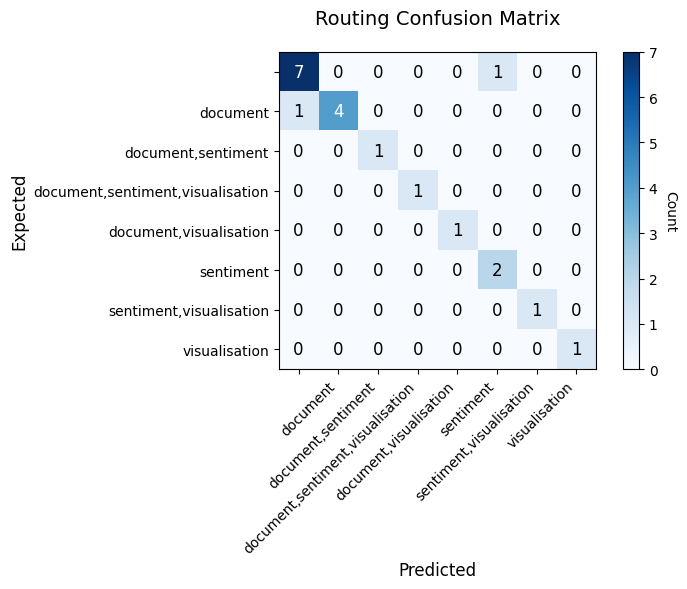

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_df, cmap='Blues', interpolation='nearest')
cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.set_ylabel('Count', rotation=-90, va='bottom', fontsize=10)

# Tick labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)

# Annotate each cell with its count (white on dark, black on light)
thresh = cm_df.values.max() / 2
for i in range(cm_df.shape[0]):
    for j in range(cm_df.shape[1]):
        color = 'white' if cm_df.iat[i, j] > thresh else 'black'
        ax.text(j, i, cm_df.iat[i, j],
                ha='center', va='center',
                color=color, fontsize=12)

# Axis labels and title
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Expected', fontsize=12)
ax.set_title('Routing Confusion Matrix', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


# Evaluate Visualisation

In [26]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser

def extract_dates(query: str) -> dict:
    """
    Uses an LLM to extract 'start_date' and 'end_date' from the query.
    Returns {"start_date": "YYYY-MM-DD" or None, "end_date": "YYYY-MM-DD" or None}.
    """
    llm = ChatOpenAI(temperature=0, model="gpt-4")
    prompt = ChatPromptTemplate.from_template("""
You are a date extraction assistant for stock visualization.
Given the following query, extract the start date and end date in the format YYYY-MM-DD.
Query: {query}
Return a JSON object with keys "start_date" and "end_date".
If explicit dates are not found, return null for each.
    """)
    chain = prompt | llm | JsonOutputParser()
    return chain.invoke({"query": query})


In [27]:
TEST_CASES = [
    # Month‑range by name
    {"query":   "Show me AAPL from January to March 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-03-31"},

    # Single month
    {"query":   "Plot AAPL for February 2024",
     "exp_start":"2024-02-01", "exp_end":"2024-02-29"},

    # Explicit day range
    {"query":   "Chart AAPL from March 15, 2024 to April 15, 2024",
     "exp_start":"2024-03-15", "exp_end":"2024-04-15"},

    # Quarter keywords
    {"query":   "Display AAPL for Q1 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-03-31"},

    {"query":   "Show me AAPL for Q2 2024",
     "exp_start":"2024-04-01", "exp_end":"2024-06-30"},

    # Half‑year
    {"query":   "Plot AAPL for the first half of 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-06-30"},

    {"query":   "Visualize AAPL from July to September 2024",
     "exp_start":"2024-07-01", "exp_end":"2024-09-30"},

    {"query":   "AAPL for H2 2024",
     "exp_start":"2024-07-01", "exp_end":"2024-12-31"},

    # Month‑name range
    {"query":   "Chart from October through December 2024",
     "exp_start":"2024-10-01", "exp_end":"2024-12-31"},

    # Mixed explicit
    {"query":   "Plot AAPL between May 10, 2024 and June 10, 2024",
     "exp_start":"2024-05-10", "exp_end":"2024-06-10"},

    # Numeric date range
    {"query":   "Graph AAPL between 2024-08-15 and 2024-09-15",
     "exp_start":"2024-08-15", "exp_end":"2024-09-15"},

    # Another quarter
    {"query":   "Plot AAPL for Q3 2024",
     "exp_start":"2024-07-01", "exp_end":"2024-09-30"},

    {"query":   "Display AAPL for the last quarter (Q4) of 2024",
     "exp_start":"2024-10-01", "exp_end":"2024-12-31"},

    # Abbreviated month‑ranges
    {"query":   "Plot AAPL Jan-Feb 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-02-29"},

    {"query":   "Chart for the period April–May 2024",
     "exp_start":"2024-04-01", "exp_end":"2024-05-31"},

    # Explicit day‐only
    {"query":   "Show me AAPL from June 1 to June 30, 2024",
     "exp_start":"2024-06-01", "exp_end":"2024-06-30"},

    # Wordy quarter
    {"query":   "Plot the stock for the second quarter of 2024",
     "exp_start":"2024-04-01", "exp_end":"2024-06-30"},

    # Natural‑language first‑3‑months
    {"query":   "Visualize AAPL for the first 3 months of 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-03-31"},

    # Explicit half‑year with dates
    {"query":   "AAPL chart for the six months from January 1, 2024 to June 30, 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-06-30"},

    # Full‑year fallback case
    {"query":   "Show me AAPL in 2024",
     "exp_start":"2024-01-01", "exp_end":"2024-12-31"},
]


In [28]:
import pandas as pd

results = []
for tc in TEST_CASES:
    out = extract_dates(tc["query"])
    s, e = out.get("start_date"), out.get("end_date")
    passed = (s == tc["exp_start"] and e == tc["exp_end"])
    results.append({
        "query": tc["query"],
        "expected": f"{tc['exp_start']} ↔ {tc['exp_end']}",
        "got":      f"{s} ↔ {e}",
        "pass":    "✅" if passed else "❌"
    })

df = pd.DataFrame(results)
# Print summary
total = len(df)
correct = (df["pass"] == "✅").sum()
print(f"Exact‐match accuracy: {correct}/{total} = {correct/total:.0%}\n")
df  # interactive display of each row


Exact‐match accuracy: 20/20 = 100%



,query,expected,got,pass
0,Show me AAPL from January to March 2024,2024-01-01 ↔ 2024-03-31,2024-01-01 ↔ 2024-03-31,✅
1,Plot AAPL for February 2024,2024-02-01 ↔ 2024-02-29,2024-02-01 ↔ 2024-02-29,✅
2,"Chart AAPL from March 15, 2024 to April 15, 2024",2024-03-15 ↔ 2024-04-15,2024-03-15 ↔ 2024-04-15,✅
3,Display AAPL for Q1 2024,2024-01-01 ↔ 2024-03-31,2024-01-01 ↔ 2024-03-31,✅
4,Show me AAPL for Q2 2024,2024-04-01 ↔ 2024-06-30,2024-04-01 ↔ 2024-06-30,✅
5,Plot AAPL for the first half of 2024,2024-01-01 ↔ 2024-06-30,2024-01-01 ↔ 2024-06-30,✅
6,Visualize AAPL from July to September 2024,2024-07-01 ↔ 2024-09-30,2024-07-01 ↔ 2024-09-30,✅
7,AAPL for H2 2024,2024-07-01 ↔ 2024-12-31,2024-07-01 ↔ 2024-12-31,✅
8,Chart from October through December 2024,2024-10-01 ↔ 2024-12-31,2024-10-01 ↔ 2024-12-31,✅
9,"Plot AAPL between May 10, 2024 and June 10, 2024",2024-05-10 ↔ 2024-06-10,2024-05-10 ↔ 2024-06-10,✅


In [32]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.8 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 325 kB 6.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [33]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=list(df.columns),
            fill_color='lightgrey',
            align='left'
        ),
        cells=dict(
            values=[df[col] for col in df.columns],
            # Color the 'pass' column cells green/red for ✅/❌
            fill_color=[
                ['#d4edda' if v=='✅' else '#f8d7da' for v in df['pass']]
            ] * len(df.columns),
            align='left'
        )
    )
])
fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=40, b=10),
    title_text="📅 Date‑Extraction Test Results"
)
fig.show()
